<a href="https://colab.research.google.com/github/hidayetyakupoglu/Anomaly-Detection/blob/master/windy10_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.3.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt


from numpy.random import seed
import tensorflow as tf
#import logging
#logging.basicConfig(level=logging.DEBUG)
#tf._logging.set_verbosity(tf._logging.error)

#tensorflow.random.set_seed
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

from sklearn.metrics import plot_confusion_matrix, classification_report
import plotly.express as px
from sklearn.preprocessing import Normalizer

from keras.layers import Dense
from keras.models import Sequential



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from scipy.spatial.distance import mahalanobis

import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import (f_classif, SelectKBest)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer


from imblearn.over_sampling import SMOTE

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#scada = pd.read_csv('Turbine6.csv', parse_dates=['Timestamp'])
scada=pd.read_csv('Turbine6.csv')

In [ ]:
faults= pd.read_csv('wind_farm_failures.csv', parse_dates=['Timestamp'])

In [ ]:
#  T06 a ait olanlar için yeni df oluştur
df_T06 = faults[faults['Turbine_ID'] == 'T06']
df_T06

,Turbine_ID,Component,Timestamp,Remarks
1,T06,GENERATOR,2016-07-11 19:48:00+00:00,Generator replaced
2,T06,GENERATOR,2016-07-24 17:01:00+00:00,Generator temperature sensor failure
3,T06,GENERATOR,2016-09-04 08:08:00+00:00,High temperature generator error
4,T06,GENERATOR,2016-10-27 16:26:00+00:00,Generator replaced
5,T06,GENERATOR,2016-10-02 17:08:00+00:00,Refrigeration system and temperature sensors i...
6,T06,HYDRAULIC_GROUP,2016-04-04 18:53:00+00:00,Error in pitch regulation


In [ ]:
scada = scada[scada['Turbine_ID'] == 'T06']

In [ ]:
# prompt: df_T06 daki Timestamp dakikalarını 10'un katı olacak şekilde aşağı yuvarla

df_T06['Timestamp'] = pd.to_datetime(df_T06['Timestamp'].dt.floor('10min'))
df_T06

,Turbine_ID,Component,Timestamp,Remarks
1,T06,GENERATOR,2016-07-11 19:40:00+00:00,Generator replaced
2,T06,GENERATOR,2016-07-24 17:00:00+00:00,Generator temperature sensor failure
3,T06,GENERATOR,2016-09-04 08:00:00+00:00,High temperature generator error
4,T06,GENERATOR,2016-10-27 16:20:00+00:00,Generator replaced
5,T06,GENERATOR,2016-10-02 17:00:00+00:00,Refrigeration system and temperature sensors i...
6,T06,HYDRAULIC_GROUP,2016-04-04 18:50:00+00:00,Error in pitch regulation


In [ ]:
# prompt: set index timestamp

df_T06 = df_T06.set_index('Timestamp')


In [ ]:
df_T06

,Turbine_ID,Component,Remarks
Timestamp,,,
2016-07-11 19:40:00+00:00,T06,GENERATOR,Generator replaced
2016-07-24 17:00:00+00:00,T06,GENERATOR,Generator temperature sensor failure
2016-09-04 08:00:00+00:00,T06,GENERATOR,High temperature generator error
2016-10-27 16:20:00+00:00,T06,GENERATOR,Generator replaced
2016-10-02 17:00:00+00:00,T06,GENERATOR,Refrigeration system and temperature sensors i...
2016-04-04 18:50:00+00:00,T06,HYDRAULIC_GROUP,Error in pitch regulation


In [ ]:
scada['Timestamp'] = pd.to_datetime(scada['Timestamp'])

In [ ]:
scada = scada.set_index('Timestamp')

KeyError: "None of ['Timestamp'] are in the columns"

In [ ]:
scada


,Unnamed: 0,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg
Timestamp,,,,,,,,,,
2016-01-01 00:00:00+00:00,176449,T06,1270.0,1232.8,1248.5,6.8,42,51,52,53
2016-01-01 00:10:00+00:00,1957,T06,1429.7,203.9,1154.1,271.7,42,51,52,52
2016-01-01 00:20:00+00:00,84192,T06,1360.5,250.3,1041.4,382.7,42,50,51,51
2016-01-01 00:30:00+00:00,129954,T06,1399.2,1228.8,1252.5,16.5,42,49,50,50
2016-01-01 00:40:00+00:00,23103,T06,1302.7,1225.1,1257.6,13.4,41,50,50,51
...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00+00:00,98884,T06,1325.6,1234.7,1265.3,18.4,40,53,55,55
2016-12-31 23:20:00+00:00,159956,T06,1336.2,1234.4,1264.0,19.8,40,53,55,55
2016-12-31 23:30:00+00:00,43492,T06,1310.4,1233.1,1260.9,12.0,39,53,55,55


In [ ]:
# prompt: df_T06 ile scada yı aynı endekte birleştir

df_T06 = pd.merge(scada, df_T06, on='Timestamp', how='left')


In [ ]:
df_T06

,Timestamp,Unnamed: 0,Turbine_ID_x,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Turbine_ID_y,Component,Remarks
0,2016-01-01 00:00:00+00:00,176449,T06,1270.0,1232.8,1248.5,6.8,42,51,52,53,NaN,NaN,NaN
1,2016-01-01 00:10:00+00:00,1957,T06,1429.7,203.9,1154.1,271.7,42,51,52,52,NaN,NaN,NaN
2,2016-01-01 00:20:00+00:00,84192,T06,1360.5,250.3,1041.4,382.7,42,50,51,51,NaN,NaN,NaN
3,2016-01-01 00:30:00+00:00,129954,T06,1399.2,1228.8,1252.5,16.5,42,49,50,50,NaN,NaN,NaN
4,2016-01-01 00:40:00+00:00,23103,T06,1302.7,1225.1,1257.6,13.4,41,50,50,51,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50570,2016-12-31 23:10:00+00:00,98884,T06,1325.6,1234.7,1265.3,18.4,40,53,55,55,NaN,NaN,NaN
50571,2016-12-31 23:20:00+00:00,159956,T06,1336.2,1234.4,1264.0,19.8,40,53,55,55,NaN,NaN,NaN
50572,2016-12-31 23:30:00+00:00,43492,T06,1310.4,1233.1,1260.9,12.0,39,53,55,55,NaN,NaN,NaN
50573,2016-12-31 23:40:00+00:00,155490,T06,1399.6,1224.1,1268.5,25.7,39,54,55,55,NaN,NaN,NaN


In [ ]:
df=df_T06

In [ ]:
# prompt:  Unnamed: 0, Turbine_ID_x, Turbine_ID_y	 ve Remarks sütunlarını çıkart

df = df.drop(columns=['Unnamed: 0', 'Turbine_ID_x', 'Turbine_ID_y', 'Remarks'])


In [ ]:


df = df.rename(columns={'Component': 'fault'})

In [ ]:
df

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,fault
0,2016-01-01 00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42,51,52,53,NaN
1,2016-01-01 00:10:00+00:00,1429.7,203.9,1154.1,271.7,42,51,52,52,NaN
2,2016-01-01 00:20:00+00:00,1360.5,250.3,1041.4,382.7,42,50,51,51,NaN
3,2016-01-01 00:30:00+00:00,1399.2,1228.8,1252.5,16.5,42,49,50,50,NaN
4,2016-01-01 00:40:00+00:00,1302.7,1225.1,1257.6,13.4,41,50,50,51,NaN
...,...,...,...,...,...,...,...,...,...,...
50570,2016-12-31 23:10:00+00:00,1325.6,1234.7,1265.3,18.4,40,53,55,55,NaN
50571,2016-12-31 23:20:00+00:00,1336.2,1234.4,1264.0,19.8,40,53,55,55,NaN
50572,2016-12-31 23:30:00+00:00,1310.4,1233.1,1260.9,12.0,39,53,55,55,NaN
50573,2016-12-31 23:40:00+00:00,1399.6,1224.1,1268.5,25.7,39,54,55,55,NaN


In [ ]:
# prompt: fault sütununda NaN değerleri yerine NF yaz

df['fault'] = df['fault'].fillna('NF')
df

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,fault
0,2016-01-01 00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42,51,52,53,NF
1,2016-01-01 00:10:00+00:00,1429.7,203.9,1154.1,271.7,42,51,52,52,NF
2,2016-01-01 00:20:00+00:00,1360.5,250.3,1041.4,382.7,42,50,51,51,NF
3,2016-01-01 00:30:00+00:00,1399.2,1228.8,1252.5,16.5,42,49,50,50,NF
4,2016-01-01 00:40:00+00:00,1302.7,1225.1,1257.6,13.4,41,50,50,51,NF
...,...,...,...,...,...,...,...,...,...,...
50570,2016-12-31 23:10:00+00:00,1325.6,1234.7,1265.3,18.4,40,53,55,55,NF
50571,2016-12-31 23:20:00+00:00,1336.2,1234.4,1264.0,19.8,40,53,55,55,NF
50572,2016-12-31 23:30:00+00:00,1310.4,1233.1,1260.9,12.0,39,53,55,55,NF
50573,2016-12-31 23:40:00+00:00,1399.6,1224.1,1268.5,25.7,39,54,55,55,NF


In [ ]:
# prompt: fault sütununda NF olmayanları göster

df[df['fault'] !='NF']


,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,fault
13639,2016-04-04 18:50:00+00:00,72.8,0.0,21.4,15.2,70,72,80,75,HYDRAULIC_GROUP
27990,2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94,122,125,111,GENERATOR
33834,2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56,71,85,67,GENERATOR
37901,2016-10-02 17:00:00+00:00,1467.7,1221.6,1279.4,38.9,47,55,88,53,GENERATOR
41460,2016-10-27 16:20:00+00:00,1796.3,1577.8,1677.8,31.0,88,130,133,117,GENERATOR


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
# prompt: df'de 2016-07-11 19:48:00+00:00	Timestampı göster

df[df['Timestamp'] == '2016-07-24 17:00:00+00:00']


,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,fault
27990,2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94,122,125,111,GENERATOR


In [ ]:
df

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,fault
0,2016-01-01 00:00:00+00:00,1270.0,1232.8,1248.5,6.8,42,51,52,53,NF
1,2016-01-01 00:10:00+00:00,1429.7,203.9,1154.1,271.7,42,51,52,52,NF
2,2016-01-01 00:20:00+00:00,1360.5,250.3,1041.4,382.7,42,50,51,51,NF
3,2016-01-01 00:30:00+00:00,1399.2,1228.8,1252.5,16.5,42,49,50,50,NF
4,2016-01-01 00:40:00+00:00,1302.7,1225.1,1257.6,13.4,41,50,50,51,NF
...,...,...,...,...,...,...,...,...,...,...
50570,2016-12-31 23:10:00+00:00,1325.6,1234.7,1265.3,18.4,40,53,55,55,NF
50571,2016-12-31 23:20:00+00:00,1336.2,1234.4,1264.0,19.8,40,53,55,55,NF
50572,2016-12-31 23:30:00+00:00,1310.4,1233.1,1260.9,12.0,39,53,55,55,NF
50573,2016-12-31 23:40:00+00:00,1399.6,1224.1,1268.5,25.7,39,54,55,55,NF


In [ ]:
df[df['fault'] !='NF']

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,fault
13639,2016-04-04 18:50:00+00:00,72.8,0.0,21.4,15.2,70,72,80,75,HYDRAULIC_GROUP
27990,2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94,122,125,111,GENERATOR
33834,2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56,71,85,67,GENERATOR
37901,2016-10-02 17:00:00+00:00,1467.7,1221.6,1279.4,38.9,47,55,88,53,GENERATOR
41460,2016-10-27 16:20:00+00:00,1796.3,1577.8,1677.8,31.0,88,130,133,117,GENERATOR


In [ ]:
perc=0.3  # test oranı orn:0.3 ise %70 train %30 testtir
fau='GENERATOR'    # arıza türleridir 'GF' 'AF' 'MF' 'FF' 'EF'
fau

'GENERATOR'

In [ ]:
data = df[df['fault'].isin([fau,'NF'])]

In [ ]:
data[data.fault!='NF']

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,fault
27990,2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94,122,125,111,GENERATOR
33834,2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56,71,85,67,GENERATOR
37901,2016-10-02 17:00:00+00:00,1467.7,1221.6,1279.4,38.9,47,55,88,53,GENERATOR
41460,2016-10-27 16:20:00+00:00,1796.3,1577.8,1677.8,31.0,88,130,133,117,GENERATOR


In [ ]:
data_hy=data

#data_hy = data_hy.drop(data_hy[(data_hy['WEC: max. Power'] == 0) & (data_hy.iloc[:, -1] == 'NF')].index)
data_nf = data_hy[data_hy.fault == 'NF'].sample(2000, random_state = 123)

df_f = data_hy[data_hy.fault!='NF']

df_combine = pd.concat((data_nf, df_f), axis=0).reset_index(drop=True)

df_combine
data_hy=df_combine

In [ ]:
df_f

,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,fault
27990,2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94,122,125,111,GENERATOR
33834,2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56,71,85,67,GENERATOR
37901,2016-10-02 17:00:00+00:00,1467.7,1221.6,1279.4,38.9,47,55,88,53,GENERATOR
41460,2016-10-27 16:20:00+00:00,1796.3,1577.8,1677.8,31.0,88,130,133,117,GENERATOR


In [ ]:
data_hy=data_hy.set_index('Timestamp')

In [ ]:
data_hy

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,fault
Timestamp,,,,,,,,,
2016-08-13 10:50:00+00:00,1764.9,1611.6,1681.3,25.3,80,127,131,114,NF
2016-04-10 21:20:00+00:00,1626.6,1252.8,1425.2,106.5,42,56,57,57,NF
2016-03-27 10:30:00+00:00,1645.9,1248.6,1388.0,110.4,43,54,55,55,NF
2016-03-27 20:50:00+00:00,1259.3,211.1,623.4,459.1,42,51,52,52,NF
2016-04-09 12:50:00+00:00,254.0,77.6,141.7,45.4,24,26,26,26,NF
...,...,...,...,...,...,...,...,...,...
2016-11-06 15:50:00+00:00,1427.4,1228.9,1291.1,44.1,41,58,59,59,NF
2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94,122,125,111,GENERATOR
2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56,71,85,67,GENERATOR


In [ ]:
data_af=data_hy

In [ ]:
data_afx= data_af.drop(columns=['fault'])
data_afx

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg
Timestamp,,,,,,,,
2016-08-13 10:50:00+00:00,1764.9,1611.6,1681.3,25.3,80,127,131,114
2016-04-10 21:20:00+00:00,1626.6,1252.8,1425.2,106.5,42,56,57,57
2016-03-27 10:30:00+00:00,1645.9,1248.6,1388.0,110.4,43,54,55,55
2016-03-27 20:50:00+00:00,1259.3,211.1,623.4,459.1,42,51,52,52
2016-04-09 12:50:00+00:00,254.0,77.6,141.7,45.4,24,26,26,26
...,...,...,...,...,...,...,...,...
2016-11-06 15:50:00+00:00,1427.4,1228.9,1291.1,44.1,41,58,59,59
2016-07-24 17:00:00+00:00,1805.2,1591.1,1681.1,27.6,94,122,125,111
2016-09-04 08:00:00+00:00,1428.8,1240.8,1272.1,37.3,56,71,85,67


In [ ]:
hdata=data_af['fault'].replace('NF', 0, inplace=True)
hdata=data_af['fault'].replace(fau, 1, inplace=True)

In [ ]:
data_afx= data_af.drop(columns=['fault'])
data_afy=data_af['fault']

In [ ]:
data_afy

Timestamp
2016-08-13 10:50:00+00:00    0
2016-04-10 21:20:00+00:00    0
2016-03-27 10:30:00+00:00    0
2016-03-27 20:50:00+00:00    0
2016-04-09 12:50:00+00:00    0
                            ..
2016-11-06 15:50:00+00:00    0
2016-07-24 17:00:00+00:00    1
2016-09-04 08:00:00+00:00    1
2016-10-02 17:00:00+00:00    1
2016-10-27 16:20:00+00:00    1
Name: fault, Length: 2004, dtype: int64

In [ ]:
scaler1 = preprocessing.MinMaxScaler()

x_new = pd.DataFrame(scaler1.fit_transform(data_afx),
                              columns = data_afx.columns,
                              index = data_afx.index)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel



sel = SelectFromModel(RandomForestClassifier(n_estimators = 200))
sel.fit(x_new,data_afy)
sel.get_support()

array([ True,  True,  True, False,  True, False,  True, False])

In [ ]:
selected_feat= x_new.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg', 'Gen_Bear_Temp_Avg',
       'Gen_Phase2_Temp_Avg'],
      dtype='object')


In [ ]:
my_dict = {}
my_list = selected_feat                                                #my_list = selectlist
my_tuple = tuple(my_list)
my_dict[my_tuple] = "value"
my_tuple

('Gen_RPM_Max',
 'Gen_RPM_Min',
 'Gen_RPM_Avg',
 'Gen_Bear_Temp_Avg',
 'Gen_Phase2_Temp_Avg')

In [ ]:
x_new = x_new.reindex(columns =my_tuple)

In [ ]:
x_new['fault']=data_af['fault']

In [ ]:
x_new

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Gen_Phase2_Temp_Avg,fault
Timestamp,,,,,,
2016-08-13 10:50:00+00:00,0.946429,0.974896,0.999227,0.331551,0.597826,0
2016-04-10 21:20:00+00:00,0.872265,0.757849,0.847022,0.128342,0.195652,0
2016-03-27 10:30:00+00:00,0.882615,0.755308,0.824914,0.133690,0.184783,0
2016-03-27 20:50:00+00:00,0.675300,0.127699,0.370498,0.128342,0.168478,0
2016-04-09 12:50:00+00:00,0.136208,0.046942,0.084215,0.032086,0.027174,0
...,...,...,...,...,...,...
2016-11-06 15:50:00+00:00,0.765444,0.743391,0.767324,0.122995,0.206522,0
2016-07-24 17:00:00+00:00,0.968039,0.962495,0.999109,0.406417,0.565217,1
2016-09-04 08:00:00+00:00,0.766195,0.750590,0.756032,0.203209,0.347826,1


In [ ]:
data_af=x_new

In [ ]:
corr_matrixx = data_af.corr()
corr_matrixx['fault'].sort_values(ascending=False)

fault                  1.000000
Gen_Phase2_Temp_Avg    0.074753
Gen_Bear_Temp_Avg      0.069702
Gen_RPM_Min            0.034974
Gen_RPM_Max            0.031843
Gen_RPM_Avg            0.031159
Gen_RPM_Std                 NaN
Gen_Phase1_Temp_Avg         NaN
Gen_Phase3_Temp_Avg         NaN
Name: fault, dtype: float64

In [ ]:
data_af

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,fault
Timestamp,,,,,,,,,
2016-08-13 10:50:00+00:00,0.946429,0.974896,0.999227,NaN,0.331551,NaN,0.597826,NaN,0
2016-04-10 21:20:00+00:00,0.872265,0.757849,0.847022,NaN,0.128342,NaN,0.195652,NaN,0
2016-03-27 10:30:00+00:00,0.882615,0.755308,0.824914,NaN,0.133690,NaN,0.184783,NaN,0
2016-03-27 20:50:00+00:00,0.675300,0.127699,0.370498,NaN,0.128342,NaN,0.168478,NaN,0
2016-04-09 12:50:00+00:00,0.136208,0.046942,0.084215,NaN,0.032086,NaN,0.027174,NaN,0
...,...,...,...,...,...,...,...,...,...
2016-11-06 15:50:00+00:00,0.765444,0.743391,0.767324,NaN,0.122995,NaN,0.206522,NaN,0
2016-07-24 17:00:00+00:00,0.968039,0.962495,0.999109,NaN,0.406417,NaN,0.565217,NaN,1
2016-09-04 08:00:00+00:00,0.766195,0.750590,0.756032,NaN,0.203209,NaN,0.347826,NaN,1


In [ ]:
# prompt: Timestamp tarih sırasına koy

data_af = data_af.sort_values(by='Timestamp', ascending=True)
data_af

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Gen_Phase2_Temp_Avg,fault
Timestamp,,,,,,
2016-01-01 00:10:00+00:00,0.766677,0.123344,0.685903,0.128342,0.168478,0
2016-01-01 08:30:00+00:00,0.734717,0.048696,0.495959,0.112299,0.146739,0
2016-01-01 14:20:00+00:00,0.879773,0.754461,0.867051,0.171123,0.222826,0
2016-01-01 20:50:00+00:00,0.844058,0.741092,0.783252,0.144385,0.201087,0
2016-01-01 23:30:00+00:00,0.838213,0.739520,0.789314,0.133690,0.184783,0
...,...,...,...,...,...,...
2016-12-31 15:00:00+00:00,0.937849,0.966487,0.996850,0.278075,0.413043,0
2016-12-31 17:20:00+00:00,0.896718,0.900369,0.965411,0.267380,0.358696,0
2016-12-31 17:40:00+00:00,0.886798,0.809993,0.920361,0.251337,0.336957,0


In [ ]:
last_40percent = round(len(data_af) - len(data_af)*perc)
trainhy = data_af.iloc[ :last_40percent, :]
testhy= data_af.iloc[last_40percent: ,:]

In [ ]:
sutun=trainhy.shape[1]
sensor_cols = trainhy.iloc[:,0:sutun-1]
broken_rows = trainhy[trainhy['fault']==1]
normal_rows = trainhy[trainhy['fault']==0]
machine_status_col = trainhy['fault']

In [ ]:
sensor_cols = trainhy.iloc[:,0:sutun-1]


In [ ]:
sensor_cols

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Gen_Phase2_Temp_Avg
Timestamp,,,,,
2016-01-01 00:10:00+00:00,0.766677,0.123344,0.685903,0.128342,0.168478
2016-01-01 08:30:00+00:00,0.734717,0.048696,0.495959,0.112299,0.146739
2016-01-01 14:20:00+00:00,0.879773,0.754461,0.867051,0.171123,0.222826
2016-01-01 20:50:00+00:00,0.844058,0.741092,0.783252,0.144385,0.201087
2016-01-01 23:30:00+00:00,0.838213,0.739520,0.789314,0.133690,0.184783
...,...,...,...,...,...
2016-09-10 02:40:00+00:00,0.000000,0.000000,0.000000,0.074866,0.086957
2016-09-10 04:10:00+00:00,0.037323,0.011433,0.024961,0.058824,0.070652
2016-09-10 06:20:00+00:00,0.157121,0.154135,0.162605,0.048128,0.059783


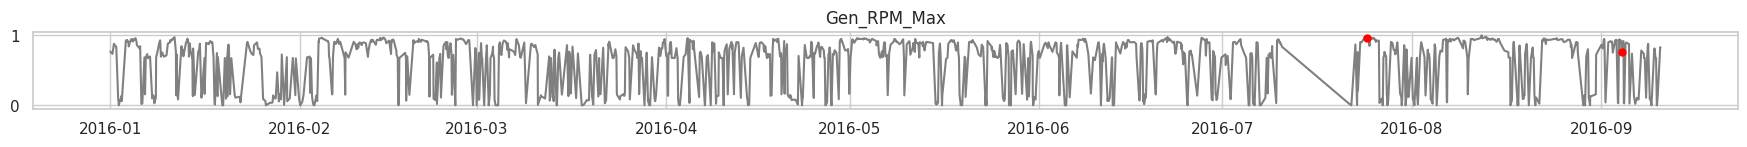

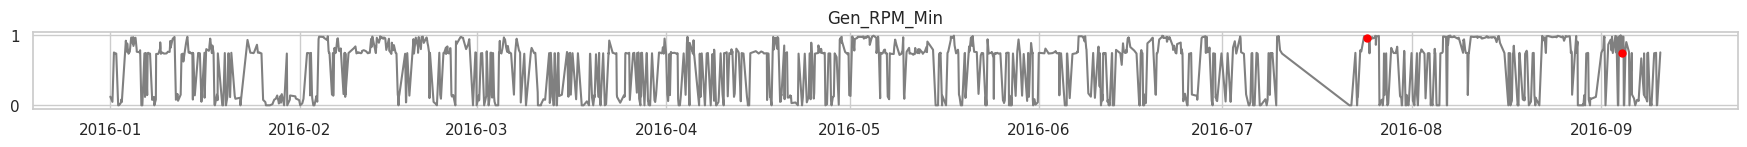

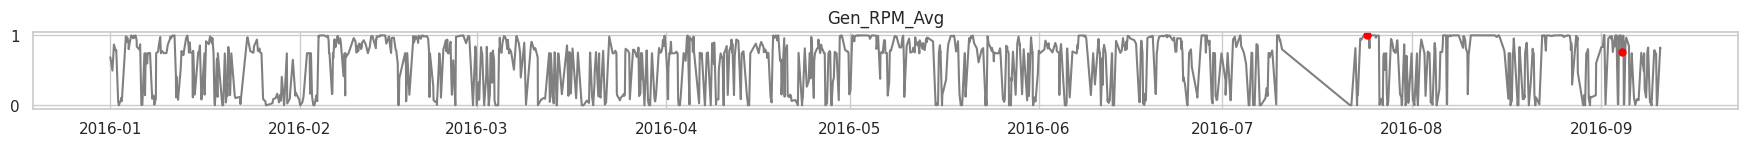

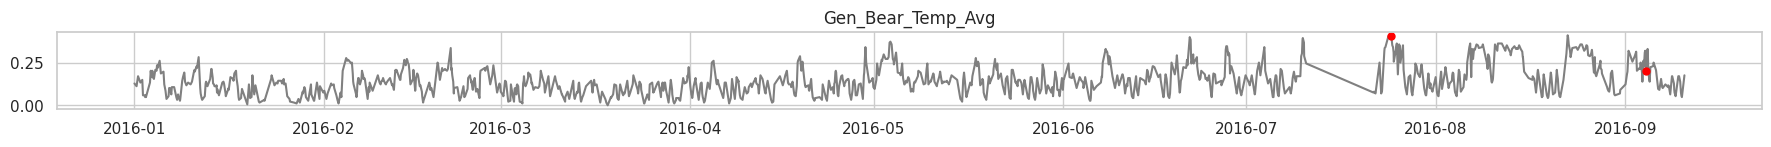

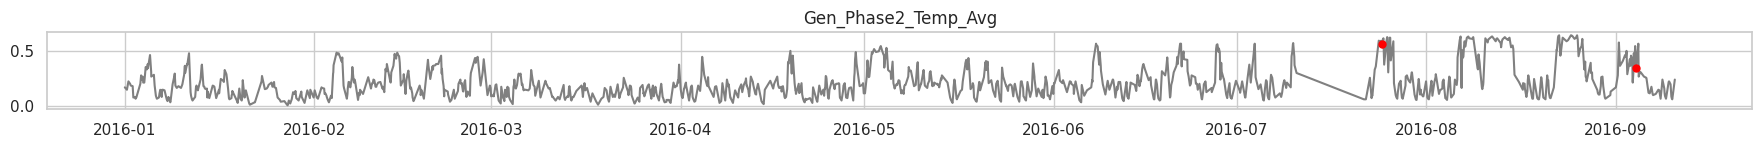

In [ ]:
for sensor in sensor_cols:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(trainhy[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='.', color='red', markersize=10)
    plot = plt.title(sensor)
    plt.xlim()

    plt.show()

In [ ]:
train=trainhy.drop(columns=['fault'])
test=testhy.drop(columns=['fault'])

In [ ]:
scaler = preprocessing.MinMaxScaler()
# normalize the data

X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [ ]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (1403, 1, 5)
Test data shape: (601, 1, 5)


In [ ]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [ ]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 5)]            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 16)             1408      
                                                                 
 lstm_5 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector_1 (RepeatVec  (None, 1, 4)              0         
 tor)                                                            
                                                                 
 lstm_6 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_7 (LSTM)               (None, 1, 16)             1344      
                                                           

In [ ]:
# fit the model to the data
nb_epochs = 50
batch_size = 5
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                  validation_split=0.05).history

Epoch 1/50
267/267 [==============================] - 8s 8ms/step - loss: 0.3243 - val_loss: 0.1343
Epoch 2/50
267/267 [==============================] - 1s 5ms/step - loss: 0.0918 - val_loss: 0.1000
Epoch 3/50
267/267 [==============================] - 1s 5ms/step - loss: 0.0714 - val_loss: 0.0869
Epoch 4/50
267/267 [==============================] - 1s 5ms/step - loss: 0.0672 - val_loss: 0.0849
Epoch 5/50
267/267 [==============================] - 1s 5ms/step - loss: 0.0662 - val_loss: 0.0809
Epoch 6/50
267/267 [==============================] - 1s 5ms/step - loss: 0.0656 - val_loss: 0.0836
Epoch 7/50
267/267 [==============================] - 2s 7ms/step - loss: 0.0652 - val_loss: 0.0817
Epoch 8/50
267/267 [==============================] - 2s 7ms/step - loss: 0.0642 - val_loss: 0.0805
Epoch 9/50
267/267 [==============================] - 1s 5ms/step - loss: 0.0641 - val_loss: 0.0786
Epoch 10/50
267/267 [==============================] - 1s 5ms/step - loss: 0.0634 - val_loss: 0.0792

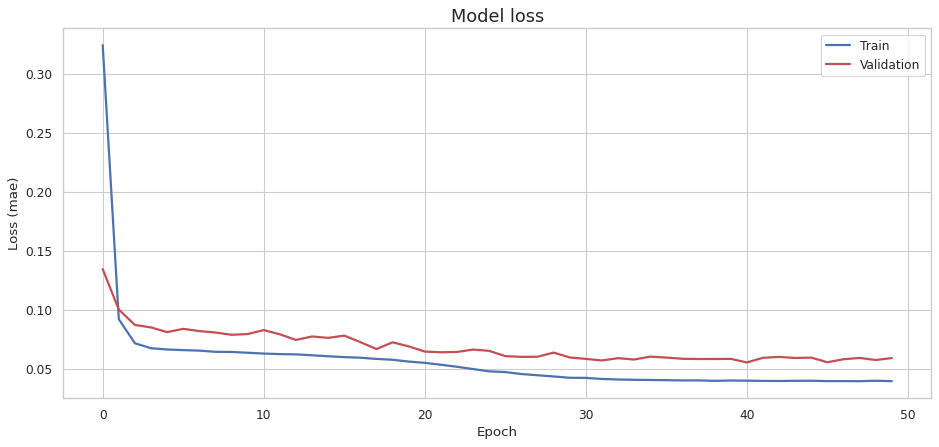

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [ ]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
#plt.figure(figsize=(16,9), dpi=80)
#plt.title('Loss Distribution', fontsize=16)
#sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
#plt.xlim([0.0,.5])

44/44 [==============================] - 1s 3ms/step


Otomatik olarak belirlenen eşik değeri: 0.23529856296039495
Toplam anomalilerin sayısı: 3


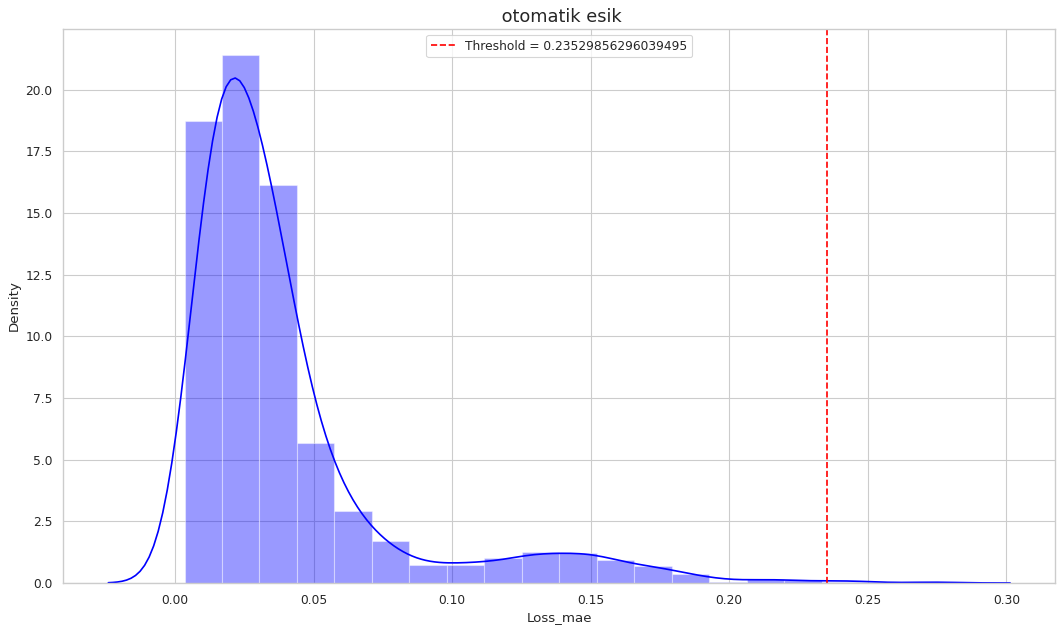

In [ ]:
# Kayıp değerlerini alın
loss_values = scored['Loss_mae'].values

# Kayıp değerlerinin z-skorlarını hesaplayın
z_scores = (loss_values - np.mean(loss_values)) / np.std(loss_values)

# Eşik değeri için bir z-score belirleyin
threshold_z_score = 5  # Örnek olarak, 3.0 z-score'u kullanıyoruz

# Eşik değeri hesaplayın
threshold_value = np.mean(loss_values) + threshold_z_score * np.std(loss_values)

# Eşik değeri görselleştirin
plt.figure(figsize=(16, 9), dpi=80)
plt.title(' otomatik esik', fontsize=16)
sns.distplot(scored['Loss_mae'], bins=20, kde=True, color='blue')
plt.axvline(x=threshold_value, color='red', linestyle='--', label=f'Threshold = {threshold_value}')
plt.legend()

# Eşik değerini kullanarak anomalileri tespit edin
anomalies = scored[scored['Loss_mae'] > threshold_value]

# Eşik değerini ve tespit edilen anomalileri yazdırın
print(f"Otomatik olarak belirlenen eşik değeri: {threshold_value}")
print(f"Toplam anomalilerin sayısı: {len(anomalies)}")


In [ ]:
# calculate the loss on the test set
TRH=threshold_value
TRH2=TRH/1.5

X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = TRH
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

19/19 [==============================] - 0s 2ms/step


,Loss_mae,Threshold,Anomaly
Timestamp,,,
2016-09-10 17:10:00+00:00,0.034664,0.235299,False
2016-09-10 19:50:00+00:00,0.061755,0.235299,False
2016-09-10 21:30:00+00:00,0.159664,0.235299,False
2016-09-11 02:00:00+00:00,0.009565,0.235299,False
2016-09-11 09:40:00+00:00,0.008366,0.235299,False


In [ ]:
lossc=np.mean(np.abs(X_pred-Xtest), axis = 1)
lossc=pd.DataFrame(lossc)

lossc['ema']= lossc.rolling(60, min_periods=1).mean()
lossc['dtres']=lossc['ema']/2+TRH2
#lossc['dtres']=lossc['ema']+TRH
lossc

,0,ema,dtres
Timestamp,,,
2016-09-10 17:10:00+00:00,0.034664,0.034664,0.174198
2016-09-10 19:50:00+00:00,0.061755,0.048209,0.180970
2016-09-10 21:30:00+00:00,0.159664,0.085361,0.199546
2016-09-11 02:00:00+00:00,0.009565,0.066412,0.190072
2016-09-11 09:40:00+00:00,0.008366,0.054803,0.184267
...,...,...,...
2016-12-31 15:00:00+00:00,0.018371,0.035950,0.174841
2016-12-31 17:20:00+00:00,0.038665,0.035897,0.174814
2016-12-31 17:40:00+00:00,0.064711,0.036128,0.174930


In [ ]:
scored0 = pd.DataFrame(index=test.index)
scored0['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored0['Threshold'] = lossc['dtres']
scored0['Anomaly'] = scored0['Loss_mae'] > scored0['Threshold']
scored0.head()

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2016-09-10 17:10:00+00:00,0.034664,0.174198,False
2016-09-10 19:50:00+00:00,0.061755,0.180970,False
2016-09-10 21:30:00+00:00,0.159664,0.199546,False
2016-09-11 02:00:00+00:00,0.009565,0.190072,False
2016-09-11 09:40:00+00:00,0.008366,0.184267,False


In [ ]:
# calculate the same metrics for the training set
# and merge all data in a single dataframe for plotting
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index

scored_train = pd.DataFrame(index=train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = TRH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

44/44 [==============================] - 0s 2ms/step


In [ ]:
scored0_train = pd.DataFrame(index=train.index)
scored0_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)

lossc1=np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
lossc1=pd.DataFrame(lossc1)

lossc1['ema']= lossc1.rolling(60, min_periods=1).mean()
#lossc1['dtres']=(lossc1[0]-lossc1['ema'])/2+TRH
lossc1['dtres']=lossc1['ema']/2+TRH2

scored0_train['Threshold'] = lossc1['dtres']
scored0_train['Anomaly'] = scored0_train['Loss_mae'] > scored0_train['Threshold']
scored0 = pd.concat([scored0_train, scored0])

In [ ]:
#broken_rows2=data_af['Fault']
broken_rows2 = trainhy['fault']
broken_rows2=pd.DataFrame(broken_rows2)
broken_rows2 = broken_rows2[broken_rows2['fault']==1]

broken_rows2

,fault
Timestamp,
2016-07-24 17:00:00+00:00,1
2016-09-04 08:00:00+00:00,1


In [ ]:
broken_rows2['Loss_mae']=scored['Loss_mae']
broken_rows2['Threshold']=scored['Threshold']

In [ ]:
broken_rows20 = trainhy['fault']
broken_rows20=pd.DataFrame(broken_rows20)
broken_rows20 = broken_rows20[broken_rows20['fault']==1]
broken_rows20['Loss_mae']=scored0['Loss_mae']
broken_rows20['Threshold']=scored0['Threshold']

In [ ]:
broken_rows2=pd.DataFrame(broken_rows2)

broken_rows20=pd.DataFrame(broken_rows20)

In [ ]:
scored1=scored
scored10=scored0
broken_rows2=broken_rows2.sort_index()
broken_rows20=broken_rows20.sort_index()

In [ ]:
broken_rows2=broken_rows2[['Loss_mae','fault']]
broken_rows20=broken_rows20[['Loss_mae','fault']]

In [ ]:
scored1=pd.DataFrame(scored1)
scored10=pd.DataFrame(scored10)

scored11=scored1
scored110=scored10

In [ ]:
scored11['Anomaly'].replace(False,0, inplace=True)
scored11['Anomaly'].replace(True,1, inplace=True)

scored110['Anomaly'].replace(False,0, inplace=True)
scored110['Anomaly'].replace(True,1, inplace=True)

scored11

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2016-01-01 00:10:00+00:00,0.145639,0.235299,0
2016-01-01 08:30:00+00:00,0.157970,0.235299,0
2016-01-01 14:20:00+00:00,0.024878,0.235299,0
2016-01-01 20:50:00+00:00,0.018868,0.235299,0
2016-01-01 23:30:00+00:00,0.017644,0.235299,0
...,...,...,...
2016-12-31 15:00:00+00:00,0.018371,0.235299,0
2016-12-31 17:20:00+00:00,0.038665,0.235299,0
2016-12-31 17:40:00+00:00,0.064711,0.235299,0


In [ ]:
scored1 = scored1.iloc[ :last_40percent, :]
scored10 =scored10.iloc[ :last_40percent, :]
scored10

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2016-01-01 00:10:00+00:00,0.145639,0.229685,0
2016-01-01 08:30:00+00:00,0.157970,0.232768,0
2016-01-01 14:20:00+00:00,0.024878,0.211614,0
2016-01-01 20:50:00+00:00,0.018868,0.200285,0
2016-01-01 23:30:00+00:00,0.017644,0.193366,0
...,...,...,...
2016-09-10 02:40:00+00:00,0.016150,0.188493,0
2016-09-10 04:10:00+00:00,0.004435,0.188227,0
2016-09-10 06:20:00+00:00,0.015319,0.188087,0


In [ ]:
import plotly.express as px
fig = px.scatter(broken_rows2['Loss_mae'], title='anomali tespiti',color_discrete_sequence=['red'])
fig.add_trace(px.line(scored1).data[0])
fig.add_trace(px.line(scored1).data[1])
fig.add_trace(px.line(scored10).data[1])

fig.show()

In [ ]:
last_percent = round(len(scored) - len(scored)*perc)
sc_train = scored.iloc[ :last_percent, :]
sc_test= scored.iloc[last_percent: ,:]

sc_test

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2016-09-10 17:10:00+00:00,0.034664,0.235299,False
2016-09-10 19:50:00+00:00,0.061755,0.235299,False
2016-09-10 21:30:00+00:00,0.159664,0.235299,False
2016-09-11 02:00:00+00:00,0.009565,0.235299,False
2016-09-11 09:40:00+00:00,0.008366,0.235299,False
...,...,...,...
2016-12-31 15:00:00+00:00,0.018371,0.235299,False
2016-12-31 17:20:00+00:00,0.038665,0.235299,False
2016-12-31 17:40:00+00:00,0.064711,0.235299,False


In [ ]:
last_percent = round(len(scored0) - len(scored0)*perc)
sc_train0 = scored0.iloc[ :last_percent, :]
sc_test0= scored0.iloc[last_percent: ,:]

sc_test0

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2016-09-10 17:10:00+00:00,0.034664,0.174198,False
2016-09-10 19:50:00+00:00,0.061755,0.180970,False
2016-09-10 21:30:00+00:00,0.159664,0.199546,False
2016-09-11 02:00:00+00:00,0.009565,0.190072,False
2016-09-11 09:40:00+00:00,0.008366,0.184267,False
...,...,...,...
2016-12-31 15:00:00+00:00,0.018371,0.174841,False
2016-12-31 17:20:00+00:00,0.038665,0.174814,False
2016-12-31 17:40:00+00:00,0.064711,0.174930,False


In [ ]:
y_pred=sc_test['Anomaly']

tres=sc_test['Threshold']

y_true=testhy['fault']

lossm=sc_test['Loss_mae']

y_pred

Timestamp
2016-09-10 17:10:00+00:00    False
2016-09-10 19:50:00+00:00    False
2016-09-10 21:30:00+00:00    False
2016-09-11 02:00:00+00:00    False
2016-09-11 09:40:00+00:00    False
                             ...  
2016-12-31 15:00:00+00:00    False
2016-12-31 17:20:00+00:00    False
2016-12-31 17:40:00+00:00    False
2016-12-31 18:00:00+00:00    False
2016-12-31 23:10:00+00:00    False
Name: Anomaly, Length: 601, dtype: bool

In [ ]:
y_pred0=sc_test0['Anomaly']

tres0=sc_test0['Threshold']

y_true0=testhy['fault']

lossm0=sc_test0['Loss_mae']

In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred1=y_pred['Anomaly'].replace(False, 0, inplace=True)
y_pred1=y_pred['Anomaly'].replace(True, 1, inplace=True)
y_pred0=pd.DataFrame(y_pred0)
y_pred10=y_pred0['Anomaly'].replace(False, 0, inplace=True)
y_pred10=y_pred0['Anomaly'].replace(True, 1, inplace=True)

y_true1=pd.DataFrame(y_true)
y_true2=pd.DataFrame(y_true)
lossm=pd.DataFrame(lossm)
y_true1['loss']=lossm
y_true1= y_true1.reindex(columns=['loss', 'fault'])

broken_rows1 = y_true1[y_true1['fault']==1]
broken_rows1=broken_rows1.sort_index()

sc_test1=sc_test
sc_test1['Anomaly'].replace(False, 0, inplace=True)
sc_test1['Anomaly'].replace(True, 1, inplace=True)

In [ ]:
y_true10=pd.DataFrame(y_true)
y_true20=pd.DataFrame(y_true)
lossm=pd.DataFrame(lossm)
y_true10['loss']=lossm
y_true10= y_true10.reindex(columns=['loss', 'fault'])

broken_rows10 = y_true10[y_true10['fault']==1]
broken_rows10=broken_rows10.sort_index()

sc_test10=sc_test0
sc_test10['Anomaly'].replace(False, 0, inplace=True)
sc_test10['Anomaly'].replace(True, 1, inplace=True)

In [ ]:
broken_rows1=pd.DataFrame(broken_rows1)
broken_rows10=pd.DataFrame(broken_rows10)


In [ ]:
sc_test10=pd.DataFrame(sc_test10)
sc_test10

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2016-09-10 17:10:00+00:00,0.034664,0.174198,0
2016-09-10 19:50:00+00:00,0.061755,0.180970,0
2016-09-10 21:30:00+00:00,0.159664,0.199546,0
2016-09-11 02:00:00+00:00,0.009565,0.190072,0
2016-09-11 09:40:00+00:00,0.008366,0.184267,0
...,...,...,...
2016-12-31 15:00:00+00:00,0.018371,0.174841,0
2016-12-31 17:20:00+00:00,0.038665,0.174814,0
2016-12-31 17:40:00+00:00,0.064711,0.174930,0


In [ ]:
sc_test1=pd.DataFrame(sc_test1)
sc_test1

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2016-09-10 17:10:00+00:00,0.034664,0.235299,0
2016-09-10 19:50:00+00:00,0.061755,0.235299,0
2016-09-10 21:30:00+00:00,0.159664,0.235299,0
2016-09-11 02:00:00+00:00,0.009565,0.235299,0
2016-09-11 09:40:00+00:00,0.008366,0.235299,0
...,...,...,...
2016-12-31 15:00:00+00:00,0.018371,0.235299,0
2016-12-31 17:20:00+00:00,0.038665,0.235299,0
2016-12-31 17:40:00+00:00,0.064711,0.235299,0


In [ ]:
import plotly.express as px





fig2 = px.scatter(broken_rows1['loss'], title='anomali tespiti',color_discrete_sequence=['red'])

fig2.add_trace(px.line(sc_test1).data[0])
fig2.add_trace(px.line(sc_test1).data[1])
fig2.add_trace(px.line(sc_test10).data[1])

fig2.data[-2].line.color = 'orange'
fig2.data[-1].line.color = 'green'
fig2.show()

In [ ]:
y_true2=pd.DataFrame(y_true2)


In [ ]:
y_pred=pd.DataFrame(y_pred)
y_pred.rename(columns={'Anomaly': 'fault'}, inplace=True)
y_pred['fault'].replace(False,0, inplace=True)
y_pred['fault'].replace(True,1, inplace=True)

In [ ]:
y_pred0=pd.DataFrame(y_pred0)
y_pred0.rename(columns={'Anomaly': 'Fault'}, inplace=True)
y_pred0['Fault'].replace(False,0, inplace=True)
y_pred0['Fault'].replace(True,1, inplace=True)

In [ ]:
y_true2 = y_true2.to_numpy()
y_pred = y_pred.to_numpy()
y_pred0 = y_pred0.to_numpy()

In [ ]:
# Confusion matrix hesapla
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp, = confusion_matrix(y_true2, y_pred).ravel()
tn0, fp0, fn0, tp0 =confusion_matrix(y_true20, y_pred0).ravel()
# PR ve FPR hesapla

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

tpr0 = tp0 / (tp0 + fn0)
fpr0 = fp0 / (fp0 + tn0)

accuracy = np.mean(y_true2 == y_pred)
accuracy0 = np.mean(y_true20 == y_pred0)
# Sonuçları yazdır
print("Fix TPR (Sensitivity):", tpr)
print("Fix FPR (1-Specificity):", fpr)
print("Fix Accuracy:", accuracy)

Fix TPR (Sensitivity): 0.0
Fix FPR (1-Specificity): 0.00667779632721202
Fix Accuracy: 0.9900166389351082


In [ ]:
print("EMA TPR (Sensitivity):", tpr0)
print("EMA FPR (1-Specificity):", fpr0)
print("EMA Accuracy:", accuracy0)

EMA TPR (Sensitivity): 0.0
EMA FPR (1-Specificity): 0.021702838063439065
EMA Accuracy: 0.9750415973377704


In [ ]:
print(classification_report(y_true2, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       599
           1       0.00      0.00      0.00         2

    accuracy                           0.99       601
   macro avg       0.50      0.50      0.50       601
weighted avg       0.99      0.99      0.99       601



In [ ]:
print(classification_report(y_true20, y_pred0))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       599
           1       0.00      0.00      0.00         2

    accuracy                           0.98       601
   macro avg       0.50      0.49      0.49       601
weighted avg       0.99      0.98      0.98       601



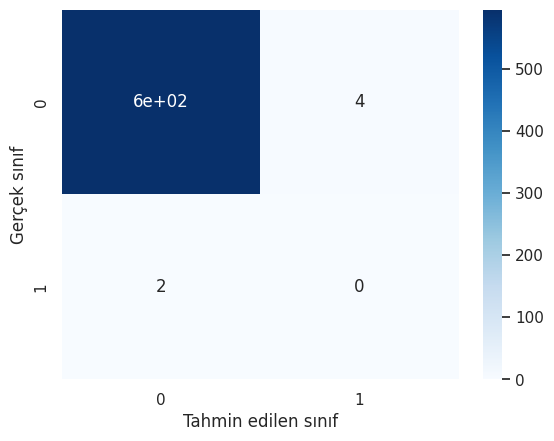

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix hesapla
cm = confusion_matrix(y_true2, y_pred)

# Görselleştir
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Tahmin edilen sınıf")
plt.ylabel("Gerçek sınıf")
plt.show()

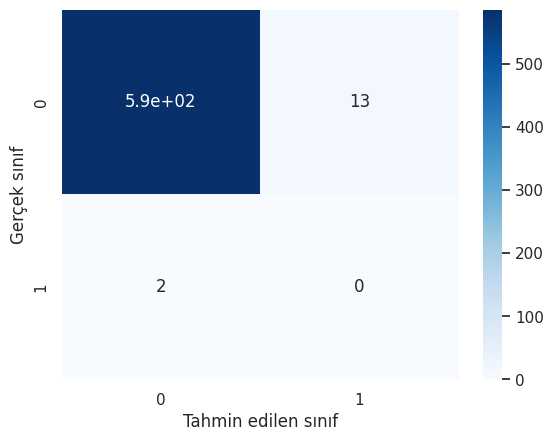

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix hesapla
cm0 = confusion_matrix(y_true20, y_pred0)

# Görselleştir
sns.heatmap(cm0, annot=True, cmap="Blues")
plt.xlabel("Tahmin edilen sınıf")
plt.ylabel("Gerçek sınıf")
plt.show()